# Regression Analysis For Choosing The Best Model
## Table of Content
* [Importing Necessary Libraries](#libs)
* [Importing Dataset](#Importingdataset)
* [Feature Engineering](#fe)
  * [Handling Categorical Features](#hcf)
  * [Handling Numerical Features](#hnf)
  * [Feature Scaling and Generating Polynomial Features](#fs)
* [Linear Regression](#lr)
* [Ridge Regression](#rr)
* [Lasso Regression](#lar)
* [Bayesian Ridge Regression](#br)
* [Building Pipelines and Performing Hyperparameter Tuning](#pipe)
* [Dumping the best model](#dump)

## Importing Necessary Libraries <a id='libs'></a>

In [161]:
# Importing Necessary Libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import pickle
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset
<a id='Importingdataset'></a>

In [162]:
# Importing Dataset

url = 'https://raw.githubusercontent.com/animesharma3/Car-Price-Predictor---Regression-Analysis/master/car%20data.csv'
data = pd.read_csv(url)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Feature Engineering <s id='fe'></a>

In [163]:
# Dropping Car_Name Feature as it doesn't help in prediction
df = data.drop(['Car_Name'], axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Handling Categorical Features <a id='hcf'></a>

In [164]:
cat_cols = ['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']
for col in cat_cols:
    print(col)
    print(df[col].unique())
    print('--------------------------------')

Fuel_Type
['Petrol' 'Diesel' 'CNG']
--------------------------------
Seller_Type
['Dealer' 'Individual']
--------------------------------
Transmission
['Manual' 'Automatic']
--------------------------------
Owner
[0 1 3]
--------------------------------


In [165]:
# One Hot Encoding
df = pd.get_dummies(df, drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [166]:
df.columns

Index(['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Individual',
       'Transmission_Manual'],
      dtype='object')

## Handling Numerical Features <a id='hnf'></a>

In [167]:
X = df.drop(['Selling_Price'], axis=1) # Independent Features
y = df['Selling_Price'] # Dependent Feature

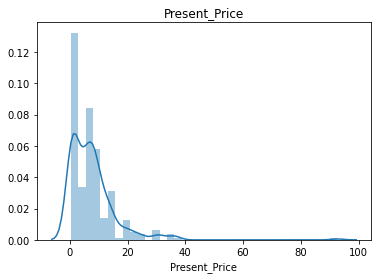

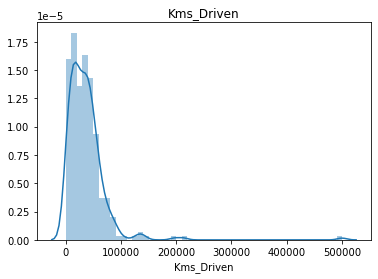

In [168]:
num_cols = ['Present_Price', 'Kms_Driven']
for col in num_cols:
    plt.title(col)
    sns.distplot(X[col])
    plt.show()

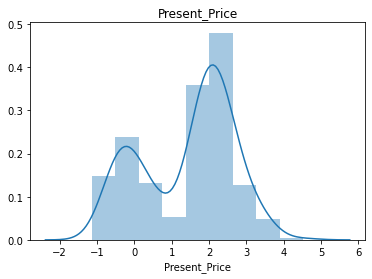

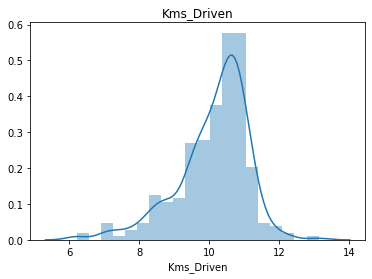

In [169]:
# Performing Log Normal Distribution
# Data Needs to be normally distributed for regression analysis
for col in num_cols:
    X[col] = np.log(X[col])
    plt.title(col)
    sns.distplot(X[col])
    plt.show()

In [170]:
# Taking current year as 2020 we are calculating no. of years since car purchase
curr_year = 2020
X['Num_Years'] = curr_year - X['Year']
X.drop(['Year'], axis=1, inplace=True)
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,Num_Years
0,1.720979,10.203592,0,0,1,0,1,6
1,2.255493,10.668955,0,1,0,0,1,7
2,2.287471,8.839277,0,0,1,0,1,3
3,1.423108,8.556414,0,0,1,0,1,9
4,1.927164,10.656082,0,1,0,0,1,6


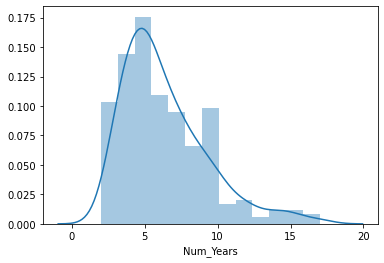

In [171]:
sns.distplot(X['Num_Years'])

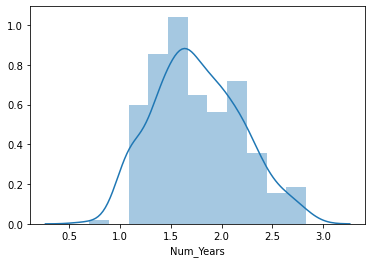

In [172]:
X['Num_Years'] = np.log(X['Num_Years'])
sns.distplot(X['Num_Years'])

## Features Scaling and Generating Polynomial Features <a id='fs'></a>

In [173]:
scaler = MinMaxScaler(feature_range=(-1, 1)) # Feature Scaling helps gradient descent to converge quickly
poly=PolynomialFeatures(degree=2) # More the no. of features, better the accuracy
X = scaler.fit_transform(X)
X=poly.fit_transform(X)

In [174]:
# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression <a id='lr'></a>

In [175]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

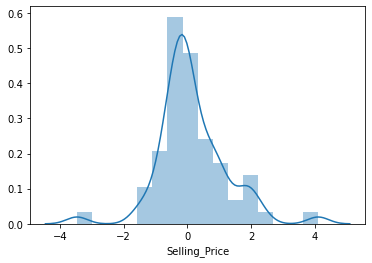

In [176]:
Y_pred = lr_model.predict(X_test)
sns.distplot(Y_pred-Y_test)

In [177]:
print("R2 Score", r2_score(Y_test, Y_pred))
print("Mean Absolute Error", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error", mean_squared_error(Y_test, Y_pred))

R2 Score 0.9479313731936944
Mean Absolute Error 0.7453317110655739
Mean Squared Error 1.1994312536521037


### Ridge Regression <a id='rr'></a>

In [178]:
ridge = Ridge()
parameters = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]
}
ridge_model = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

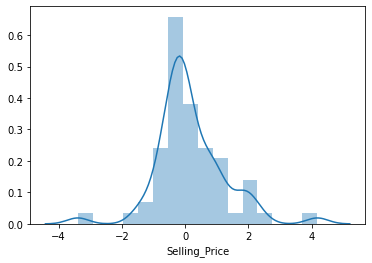

In [179]:
Y_pred = ridge_model.predict(X_test)
sns.distplot(Y_pred-Y_test)

In [180]:
print("R2 Score", r2_score(Y_test, Y_pred))
print("Mean Absolute Error", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error", mean_squared_error(Y_test, Y_pred))

R2 Score 0.9474195576129292
Mean Absolute Error 0.7489076590671597
Mean Squared Error 1.211221224721622


### Lasso Regression <a id='lar'></a>

In [181]:
lasso = Lasso()
parameters = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]
}
lasso_model = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

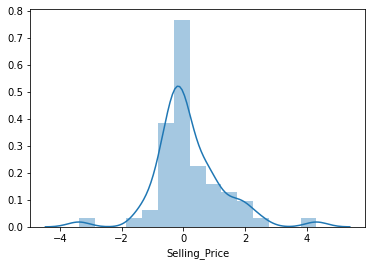

In [182]:
Y_pred = lasso_model.predict(X_test)
sns.distplot(Y_pred-Y_test)

In [183]:
print("R2 Score", r2_score(Y_test, Y_pred))
print("Mean Absolute Error", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error", mean_squared_error(Y_test, Y_pred))

R2 Score 0.9467543836438179
Mean Absolute Error 0.7474302429231873
Mean Squared Error 1.2265438959077815


### Bayesian Ridge Regression <a id='br'></a>

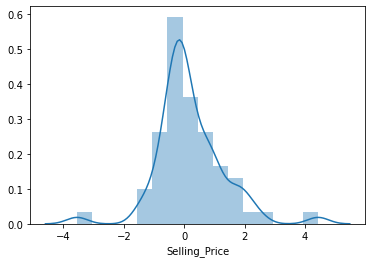

In [184]:
br_model = BayesianRidge()
br_model.fit(X_train, Y_train)
Y_pred = br_model.predict(X_test)
sns.distplot(Y_pred-Y_test)

In [185]:
print("R2 Score", r2_score(Y_test, Y_pred))
print("Mean Absolute Error", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error", mean_squared_error(Y_test, Y_pred))

R2 Score 0.9450988433923936
Mean Absolute Error 0.7565385642969532
Mean Squared Error 1.2646802332962095


**All the models above worked in pretty much same way, giving almost same r2 score and errors and distplot is also almost same**

## Building Pipelines and Performing Hyperparameter Tuning for selecting the best Model and their best Hyperparameters <a id='pipe'></a>

In [186]:
pipe = Pipeline([
    ('regressor', LinearRegression())
])
grid_params = [
    {
        'regressor': [LinearRegression()]
    },
    {
        'regressor': [Lasso()],
        'regressor__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.5, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]
    },
    {
        'regressor': [Ridge()],
        'regressor__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 0.5, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]
    },
    {
        'regressor': [BayesianRidge()]
    },
    {
        'regressor': [RandomForestRegressor()],
        'regressor__max_features': ['auto', 'sqrt'],
        'regressor__max_depth': [int(x) for x in np.linspace(5, 30, num=6)],
        'regressor__min_samples_split': [2, 5, 10, 15, 100],
        'regressor__min_samples_leaf': [1, 2, 5, 10]
    },
]

In [187]:
best_model = GridSearchCV(estimator=pipe, param_grid=grid_params, cv=5, n_jobs=1, verbose=2)

In [188]:
best_model.fit(X_train, Y_train)

Fitting 5 folds for each of 276 candidates, totalling 1380 fits
[CV] regressor=LinearRegression() ....................................
[CV] ..................... regressor=LinearRegression(), total=   0.0s
[CV] regressor=LinearRegression() ....................................
[CV] ..................... regressor=LinearRegression(), total=   0.0s
[CV] regressor=LinearRegression() ....................................
[CV] ..................... regressor=LinearRegression(), total=   0.0s
[CV] regressor=LinearRegression() ....................................
[CV] ..................... regressor=LinearRegression(), total=   0.0s
[CV] regressor=LinearRegression() ....................................
[CV] ..................... regressor=LinearRegression(), total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-15 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-15, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-15 .......................
[CV] ........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] regressor=Lasso(), regressor__alpha=1e-10 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-10, total=   0.1s
[CV] regressor=Lasso(), regressor__alpha=1e-10 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-10, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-10 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-10, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-10 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-10, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-10 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-10, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-08 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-08, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=1e-08 .......................
[CV] ........ regressor=Lasso(), regressor__alpha=1e-08, total=   0.0s
[CV] 

[CV] ........... regressor=Lasso(), regressor__alpha=55, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=100 .........................
[CV] .......... regressor=Lasso(), regressor__alpha=100, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=100 .........................
[CV] .......... regressor=Lasso(), regressor__alpha=100, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=100 .........................
[CV] .......... regressor=Lasso(), regressor__alpha=100, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=100 .........................
[CV] .......... regressor=Lasso(), regressor__alpha=100, total=   0.0s
[CV] regressor=Lasso(), regressor__alpha=100 .........................
[CV] .......... regressor=Lasso(), regressor__alpha=100, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=1e-15 .......................
[CV] ........ regressor=Ridge(), regressor__alpha=1e-15, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=1e-15 .......................
[CV] .

[CV] ........... regressor=Ridge(), regressor__alpha=30, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=30 ..........................
[CV] ........... regressor=Ridge(), regressor__alpha=30, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=35 ..........................
[CV] ........... regressor=Ridge(), regressor__alpha=35, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=35 ..........................
[CV] ........... regressor=Ridge(), regressor__alpha=35, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=35 ..........................
[CV] ........... regressor=Ridge(), regressor__alpha=35, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=35 ..........................
[CV] ........... regressor=Ridge(), regressor__alpha=35, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=35 ..........................
[CV] ........... regressor=Ridge(), regressor__alpha=35, total=   0.0s
[CV] regressor=Ridge(), regressor__alpha=40 ..........................
[CV] .

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  re

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  re

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  re

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  re

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  re

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  re

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=15, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.6s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.6s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=25, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.5s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=auto, regressor__min_samples_leaf=10, regressor__min_samples_split=

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=1, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=5, regressor__min_samples_split=10 
[C

[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=5, total=   0.3s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10 
[CV]  regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=10, total=   0.4s
[CV] regressor=RandomForestRegressor(), regressor__max_depth=30, regressor__max_features=sqrt, regressor__min_samples_leaf=10, regressor__min_samples_split=

[Parallel(n_jobs=1)]: Done 1380 out of 1380 | elapsed:  7.3min finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regressor', LinearRegression())]),
             n_jobs=1,
             param_grid=[{'regressor': [LinearRegression()]},
                         {'regressor': [Lasso(alpha=0.01)],
                          'regressor__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                               0.5, 1, 5, 10, 20, 30, 35, 40,
                                               45, 50, 55, 100]},
                         {'regressor': [Ridge()],
                          'regressor__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                               0.5, 1, 5, 10, 20, 30, 35, 40,
                                               45, 50, 55, 100]},
                         {'regressor': [BayesianRidge()]},
                         {'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [5, 10, 15, 20, 25, 30],
                          'regressor__max_features': ['auto'

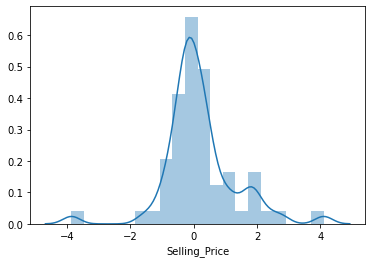

In [189]:
Y_pred = best_model.predict(X_test)
sns.distplot(Y_pred-Y_test)

In [190]:
print(best_model.best_params_)

{'regressor': Lasso(alpha=0.01), 'regressor__alpha': 0.01}


In [191]:
print("R2 Score", r2_score(Y_test, Y_pred))
print("Mean Absolute Error", mean_absolute_error(Y_test, Y_pred))
print("Mean Squared Error", mean_squared_error(Y_test, Y_pred))

R2 Score 0.9442452908334493
Mean Absolute Error 0.7422001552130918
Mean Squared Error 1.2843423154102787


## Dumping the best model <a id='dump'></a>

In [192]:
file = open('best_model.pkl', 'wb')
pickle.dump(best_model, file)

In [196]:
best_model.best_estimator_

Pipeline(steps=[('regressor', Lasso(alpha=0.01))])

In [202]:
model = Lasso(alpha=0.01) # The best model comes out to be Lasso(alpha=0.01)
model.fit(X_train, Y_train)

Lasso(alpha=0.01)

In [203]:
file = open('model.pkl', 'wb')
pickle.dump(model, file)